# Determining optimal number of topics using Coherence Score

Determining the optimal number of topics (num_topics) in LDA topic modeling is crucial for extracting meaningful insights. We can use coherence score to find the best number of topics. The coherence score measures the quality of topics by evaluating the semantic similarity of the top words in each topic. The higher the coherence score, the better the topics.

Note:
In topic modeling using Latent Dirichlet Allocation (LDA), the coherence score is a metric used to evaluate how semantically similar the words within a topic are to each other, essentially measuring how interpretable and meaningful a given topic is to humans; a higher coherence score indicates that the words within a topic are closely related and make sense together, while a lower score suggests a less coherent, unclear topic. 

Num Topics: 2, Coherence Score: 0.4440
Num Topics: 4, Coherence Score: 0.4734
Num Topics: 6, Coherence Score: 0.5585
Num Topics: 8, Coherence Score: 0.5149
Num Topics: 10, Coherence Score: 0.5502
Num Topics: 12, Coherence Score: 0.5745
Num Topics: 14, Coherence Score: 0.5697


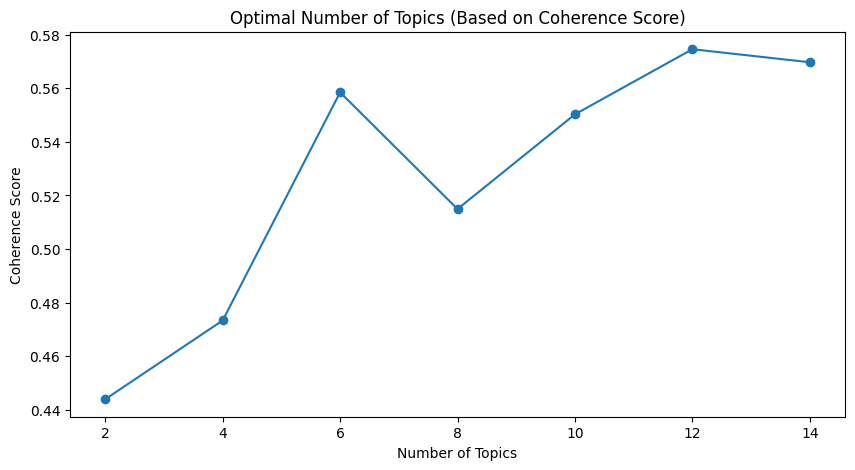

In [22]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("../datasets/news_dataset_content_cleaned.csv")  # Replace with actual file path

# Step 2: Ensure `content_words` is a list of tokenized words
df['content_words'] = df['content_words'].apply(eval)  # Convert string to list if needed

# Step 3: Create Dictionary and Corpus
dictionary = corpora.Dictionary(df['content_words'])
dictionary.filter_extremes(no_below=10, no_above=0.4, keep_n=10000)  # Reduce noise
corpus = [dictionary.doc2bow(text) for text in df['content_words']]

# Step 4: Define a range of topic numbers to test
topic_range = range(2, 15, 2)  # Test even numbers between 2 and 14
coherence_scores = []

# Step 5: Train LDA models with different `num_topics` and calculate coherence
for num_topics in topic_range:
    lda_model = gensim.models.LdaMulticore(
        corpus, num_topics=num_topics, id2word=dictionary, passes=5, workers=4, random_state=42
    )
    
    coherence_model = CoherenceModel(model=lda_model, texts=df['content_words'], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    
    print(f"Num Topics: {num_topics}, Coherence Score: {coherence_score:.4f}")

# Step 6: Plot Coherence Score vs Number of Topics
plt.figure(figsize=(10, 5))
plt.plot(topic_range, coherence_scores, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics (Based on Coherence Score)")
plt.show()

# Start trying the toping modeling

# First try (not really good (?))

Topic 0: 0.043*"trump" + 0.038*"president" + 0.035*"biden" + 0.022*"harris" + 0.016*"campaign" + 0.014*"republican" + 0.013*"former" + 0.012*"democratic" + 0.011*"donald" + 0.010*"democrat"

Topic 1: 0.025*"party" + 0.016*"election" + 0.015*"government" + 0.013*"political" + 0.012*"minister" + 0.011*"labour" + 0.011*"conservative" + 0.011*"leader" + 0.009*"prime" + 0.008*"uk"

Topic 2: 0.032*"new" + 0.014*"york" + 0.008*"game" + 0.007*"show" + 0.007*"book" + 0.007*"time" + 0.007*"first" + 0.007*"gold" + 0.006*"world" + 0.006*"star"

Topic 3: 0.024*"said" + 0.011*"war" + 0.011*"israel" + 0.010*"official" + 0.009*"state" + 0.009*"police" + 0.008*"attack" + 0.008*"security" + 0.007*"military" + 0.006*"gaza"

Topic 4: 0.015*"school" + 0.012*"city" + 0.012*"university" + 0.009*"student" + 0.009*"area" + 0.009*"di" + 0.008*"across" + 0.007*"water" + 0.006*"north" + 0.006*"south"

Topic 5: 0.033*"year" + 0.017*"price" + 0.015*"per" + 0.014*"company" + 0.013*"million" + 0.012*"rate" + 0.012*"l

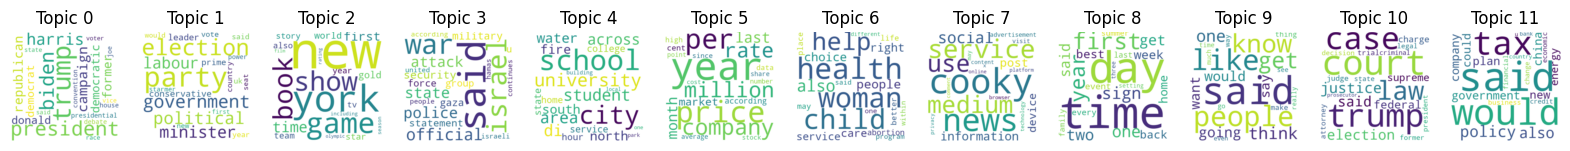

In [27]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaMulticore
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import multiprocessing

# Load dataset (update with your actual file path)
df = pd.read_csv("../datasets/news_dataset_content_cleaned.csv")  # Replace with actual file path

# Convert content_words column (assumed to be list-like) into a list of tokenized words
df['content_words'] = df['content_words'].apply(eval)  # Ensure the column is in list format

# 1. Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['content_words'])

# 2. Filter out extreme tokens
dictionary.filter_extremes(no_below=10, no_above=0.4, keep_n=10000)

# 3. Convert to Bag-of-Words format
corpus = [dictionary.doc2bow(text) for text in df['content_words']]

# 4. Train LDA Model Using MULTICORE Processing
num_topics = 12
lda_model = LdaMulticore(
    corpus=corpus, 
    num_topics=num_topics, 
    id2word=dictionary, 
    passes=5, 
    workers=multiprocessing.cpu_count(),  # Use all available CPU cores
    random_state=42
)

# 5. Print the top words in each topic
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx}: {topic}\n")

# 6. Visualize topics using WordClouds
fig, axes = plt.subplots(1, num_topics, figsize=(20, 5))
for i, ax in enumerate(axes):
    topic_words = dict(lda_model.show_topic(i, 20))
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(topic_words)
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"Topic {i}")
plt.show()

# 7. Save the model and dictionary
lda_model.save("lda_model.model")
dictionary.save("lda_dictionary.dict")


# Second try: Not really good bcs still contain a lot of stopwords?

Topic 0: 0.012*"former" + 0.009*"today" + 0.008*"family" + 0.008*"book" + 0.007*"also" + 0.007*"story" + 0.006*"second" + 0.006*"child" + 0.006*"first" + 0.006*"history"

Topic 1: 0.009*"need" + 0.007*"work" + 0.007*"also" + 0.007*"student" + 0.007*"offer" + 0.006*"help" + 0.006*"use" + 0.006*"university" + 0.005*"news" + 0.005*"used"

Topic 2: 0.018*"get" + 0.013*"going" + 0.012*"want" + 0.010*"say" + 0.009*"thing" + 0.009*"way" + 0.008*"best" + 0.007*"day" + 0.007*"right" + 0.007*"really"

Topic 3: 0.026*"company" + 0.012*"also" + 0.011*"business" + 0.008*"market" + 0.007*"many" + 0.006*"price" + 0.006*"industry" + 0.006*"product" + 0.005*"investor" + 0.005*"share"

Topic 4: 0.014*"city" + 0.010*"police" + 0.010*"two" + 0.009*"home" + 0.007*"service" + 0.007*"area" + 0.007*"including" + 0.006*"according" + 0.006*"attack" + 0.006*"death"

Topic 5: 0.031*"u" + 0.020*"country" + 0.013*"million" + 0.011*"may" + 0.011*"china" + 0.011*"according" + 0.009*"ukraine" + 0.009*"russia" + 0.009*

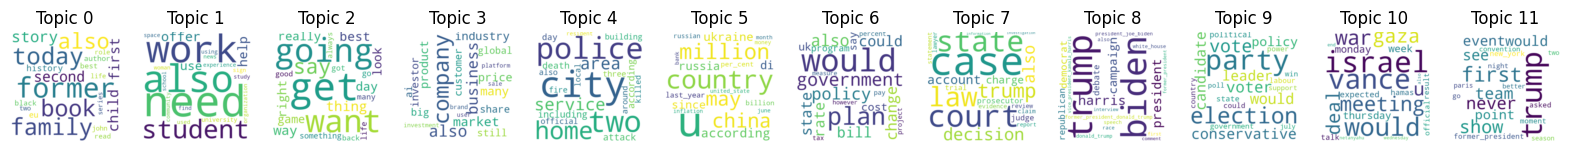

In [ ]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaMulticore
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import multiprocessing
from gensim.models.phrases import Phrases, Phraser
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset (update with your actual file path)
df = pd.read_csv("../datasets/news_dataset_content_cleaned.csv")  # Replace with actual file path

# Convert content_words column (assumed to be list-like) into a list of tokenized words
df['content_words'] = df['content_words'].apply(eval)  # Ensure the column is in list format

# 1. Detect Bigrams and Trigrams
bigram = Phrases(df['content_words'], min_count=5, threshold=10)
trigram = Phrases(bigram[df['content_words']], threshold=10)

bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# Apply bigrams and trigrams
df['content_words'] = df['content_words'].apply(lambda x: trigram_mod[bigram_mod[x]])

# 2. Remove Low-Information Words (Manually curated stopwords)
custom_stopwords = set(["said", "one", "new", "people", "like", "time", "year", "just", "know", "think", "make"])
df['content_words'] = df['content_words'].apply(lambda x: [word for word in x if word not in custom_stopwords])

# 3. Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['content_words'])

# 4. Filter out extreme tokens
dictionary.filter_extremes(no_below=10, no_above=0.4, keep_n=10000)

# 5. Convert to Bag-of-Words format
corpus = [dictionary.doc2bow(text) for text in df['content_words']]

# 6. Train LDA Model Using MULTICORE Processing
num_topics = 12
lda_model = LdaMulticore(
    corpus=corpus, 
    num_topics=num_topics, 
    id2word=dictionary, 
    passes=5, 
    workers=multiprocessing.cpu_count(),  # Use all available CPU cores
    random_state=42
)

# 7. Print the top words in each topic
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx}: {topic}\n")

# 8. Visualize topics using WordClouds
fig, axes = plt.subplots(1, num_topics, figsize=(20, 5))
for i, ax in enumerate(axes):
    topic_words = dict(lda_model.show_topic(i, 20))
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(topic_words)
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"Topic {i}")
plt.show()

# 9. Save the model and dictionary
lda_model.save("lda_model.model")
dictionary.save("lda_dictionary.dict")

# Third try: This one actually not bad i think (?), like the wordcloud can show difference between each topic quite well. But still got some stopwords like "really", "according", "might", "may", "say" etc.

Topic 0: 0.046*"party" + 0.020*"election" + 0.016*"conservative" + 0.015*"political" + 0.015*"labour" + 0.015*"government" + 0.014*"vote" + 0.012*"leader" + 0.008*"seat" + 0.007*"candidate"

Topic 1: 0.024*"state" + 0.013*"law" + 0.013*"city" + 0.012*"school" + 0.010*"student" + 0.009*"program" + 0.008*"university" + 0.006*"community" + 0.005*"health" + 0.005*"local"

Topic 2: 0.044*"biden" + 0.027*"trump" + 0.026*"harris" + 0.023*"president" + 0.022*"campaign" + 0.013*"debate" + 0.008*"democrat" + 0.008*"interview" + 0.007*"speech" + 0.007*"convention"

Topic 3: 0.013*"job" + 0.009*"help" + 0.009*"u" + 0.008*"policy" + 0.008*"important" + 0.007*"government" + 0.007*"change" + 0.006*"work" + 0.006*"project" + 0.006*"company"

Topic 4: 0.057*"trump" + 0.020*"republican" + 0.014*"case" + 0.011*"democrat" + 0.010*"state" + 0.010*"president" + 0.010*"election" + 0.009*"court" + 0.009*"biden" + 0.007*"former"

Topic 5: 0.015*"going" + 0.008*"best" + 0.007*"got" + 0.007*"really" + 0.007*"gam

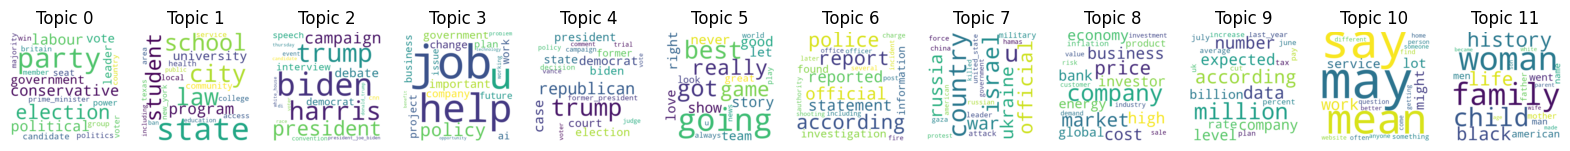

In [ ]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaMulticore
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import multiprocessing
from gensim.models.phrases import Phrases, Phraser
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset (update with your actual file path)
df = pd.read_csv("../datasets/news_dataset_content_cleaned.csv")  # Replace with actual file path

# Convert content_words column (assumed to be list-like) into a list of tokenized words
df['content_words'] = df['content_words'].apply(eval)  # Ensure the column is in list format

# 1. Detect Bigrams and Trigrams with Higher Threshold
bigram = Phrases(df['content_words'], min_count=10, threshold=20)  # Increased min_count and threshold
trigram = Phrases(bigram[df['content_words']], min_count=10, threshold=20)

bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# Apply bigrams and trigrams
df['content_words'] = df['content_words'].apply(lambda x: trigram_mod[bigram_mod[x]])

# 2. Remove Low-Information Words (Expanded Stopwords List)
custom_stopwords = set([
    "said", "one", "new", "people", "like", "time", "year", "just", "know", "think", "make", "get", "also",
    "many", "day", "week", "month", "even", "still", "back", "see", "way", "want", "need", "thing", "go",
    "use", "give", "first", "two", "three", "take", "since", "well", "much", "could", "should", "would"
])
df['content_words'] = df['content_words'].apply(lambda x: [word for word in x if word not in custom_stopwords])

# 3. Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['content_words'])

# 4. Filter out extreme tokens (Higher no_below to remove rare words)
dictionary.filter_extremes(no_below=20, no_above=0.4, keep_n=10000)  # Increased no_below from 10 to 20

# 5. Convert to Bag-of-Words format
corpus = [dictionary.doc2bow(text) for text in df['content_words']]

# 6. Train LDA Model Using MULTICORE Processing
num_topics = 12
lda_model = LdaMulticore(
    corpus=corpus, 
    num_topics=num_topics, 
    id2word=dictionary, 
    passes=5, 
    workers=multiprocessing.cpu_count(),  # Use all available CPU cores
    random_state=42
)

# 7. Print the top words in each topic
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx}: {topic}\n")

# 8. Visualize topics using WordClouds
fig, axes = plt.subplots(1, num_topics, figsize=(20, 5))
for i, ax in enumerate(axes):
    topic_words = dict(lda_model.show_topic(i, 20))
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(topic_words)
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"Topic {i}")
plt.show()

# 9. Save the model and dictionary
lda_model.save("lda_model.model")
dictionary.save("lda_dictionary.dict")

# Fourth try: Actually this one also not bad i think (?), and the coherence score also not bad. But still contain many stopwords like the third try

LDA Coherence Score: 0.5653
Topic 0: 0.018*"child" + 0.012*"account" + 0.009*"family" + 0.009*"may" + 0.008*"age" + 0.008*"woman" + 0.008*"care" + 0.007*"health" + 0.007*"parent" + 0.007*"say"

Topic 1: 0.058*"trump" + 0.043*"biden" + 0.024*"president" + 0.022*"campaign" + 0.020*"harris" + 0.016*"republican" + 0.014*"democrat" + 0.010*"democratic" + 0.009*"party" + 0.009*"debate"

Topic 2: 0.009*"woman" + 0.009*"show" + 0.008*"video" + 0.008*"best" + 0.008*"story" + 0.007*"di" + 0.007*"life" + 0.007*"book" + 0.006*"black" + 0.006*"love"

Topic 3: 0.030*"party" + 0.022*"government" + 0.020*"political" + 0.018*"election" + 0.016*"policy" + 0.015*"conservative" + 0.013*"leader" + 0.013*"labour" + 0.011*"vote" + 0.009*"power"

Topic 4: 0.014*"change" + 0.012*"question" + 0.011*"statement" + 0.009*"different" + 0.009*"comment" + 0.007*"response" + 0.007*"everyone" + 0.007*"call" + 0.007*"situation" + 0.007*"detail"

Topic 5: 0.016*"school" + 0.012*"student" + 0.012*"community" + 0.011*"work

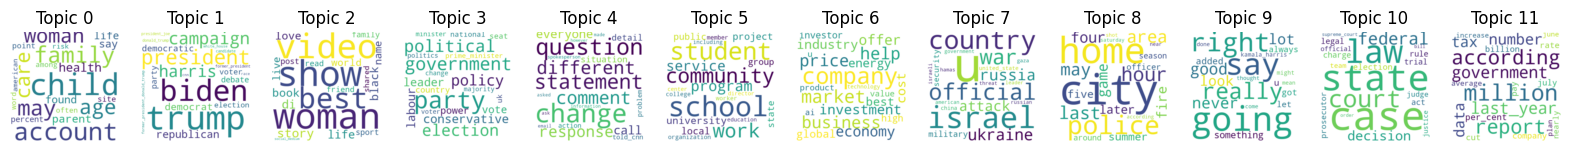

In [ ]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaMulticore
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import multiprocessing
from gensim.models.phrases import Phrases, Phraser
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset (update with your actual file path)
df = pd.read_csv("../datasets/news_dataset_content_cleaned.csv")  # Replace with actual file path

# Convert content_words column (assumed to be list-like) into a list of tokenized words
df['content_words'] = df['content_words'].apply(eval)  # Ensure the column is in list format

# 1. Detect Bigrams and Trigrams with Higher Threshold
bigram = Phrases(df['content_words'], min_count=10, threshold=30)  # Increased min_count and threshold
trigram = Phrases(bigram[df['content_words']], min_count=10, threshold=30)

bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# Apply bigrams and trigrams
df['content_words'] = df['content_words'].apply(lambda x: trigram_mod[bigram_mod[x]])

# 2. Remove Low-Information Words (Expanded Stopwords List)
custom_stopwords = set([
    "said", "one", "new", "people", "like", "time", "year", "just", "know", "think", "make", "get", "also",
    "many", "day", "week", "month", "even", "still", "back", "see", "way", "want", "need", "thing", "go",
    "use", "give", "first", "two", "three", "take", "since", "well", "much", "could", "should", "would"
])
df['content_words'] = df['content_words'].apply(lambda x: [word for word in x if word not in custom_stopwords])

# 3. Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['content_words'])

# 4. Filter out extreme tokens (Higher no_below to remove rare words)
dictionary.filter_extremes(no_below=20, no_above=0.4, keep_n=10000)  # Increased no_below from 10 to 20

# 5. Convert to Bag-of-Words format
corpus = [dictionary.doc2bow(text) for text in df['content_words']]

# 6. Train LDA Model Using MULTICORE Processing
num_topics = 12
lda_model = LdaMulticore(
    corpus=corpus, 
    num_topics=num_topics, 
    id2word=dictionary, 
    passes=10,  # Increased passes for better convergence
    workers=multiprocessing.cpu_count(),  # Use all available CPU cores
    random_state=42
)

# 7. Compute LDA Coherence Score
coherence_model = CoherenceModel(model=lda_model, texts=df['content_words'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"LDA Coherence Score: {coherence_score:.4f}")

# 8. Print the top words in each topic
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx}: {topic}\n")

# 9. Visualize topics using WordClouds
fig, axes = plt.subplots(1, num_topics, figsize=(20, 5))
for i, ax in enumerate(axes):
    topic_words = dict(lda_model.show_topic(i, 20))
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(topic_words)
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"Topic {i}")
plt.show()

# 10. Save the model and dictionary
lda_model.save("lda_model.model")
dictionary.save("lda_dictionary.dict")


# Might be the best? (1) -> Highest Coherence Score. I feel that this worcloud is the BEST to differentiate each topic (?)

Might be one of the best wordcloud for each topic? As in the word inside the wordcloud is meaningful to represent a topic?

In this code, i DID NOT consider "di" and "mean" as a list of expanded stopwords (apart from the one we import from nltk module).
do you think "di" and "mean" should be considered as stopwords? 

Note: 
1. Idk why but if i did not consider "di" and "mean" as stopwords, the coherence score become higher
2. Honestly, idk what "di" means. Pls refer to "Topic 5" in the output to see the word "di" 
3. I found a journal saying that usually coherence score of 0.3-0.6 is considered good to use. https://link.springer.com/article/10.1007/s11042-022-13500-z


LDA Coherence Score: 0.5836
Topic 0: 0.025*"case" + 0.022*"trump" + 0.018*"court" + 0.010*"law" + 0.010*"federal" + 0.009*"decision" + 0.009*"claim" + 0.009*"charge" + 0.009*"trial" + 0.008*"prosecutor"

Topic 1: 0.019*"woman" + 0.019*"family" + 0.016*"child" + 0.011*"police" + 0.009*"site" + 0.009*"death" + 0.007*"man" + 0.007*"officer" + 0.007*"found" + 0.007*"men"

Topic 2: 0.022*"israel" + 0.015*"attack" + 0.014*"war" + 0.012*"post" + 0.010*"military" + 0.009*"social_medium" + 0.009*"gaza" + 0.009*"vice_president_kamala_harris" + 0.009*"video" + 0.009*"official"

Topic 3: 0.017*"city" + 0.014*"home" + 0.009*"area" + 0.008*"last" + 0.008*"hour" + 0.006*"across" + 0.006*"water" + 0.006*"fire" + 0.006*"four" + 0.005*"around"

Topic 4: 0.030*"party" + 0.024*"election" + 0.020*"leader" + 0.017*"government" + 0.014*"conservative" + 0.013*"political" + 0.013*"labour" + 0.012*"country" + 0.011*"vote" + 0.010*"ukraine"

Topic 5: 0.013*"right" + 0.009*"mean" + 0.007*"never" + 0.007*"di" + 0.

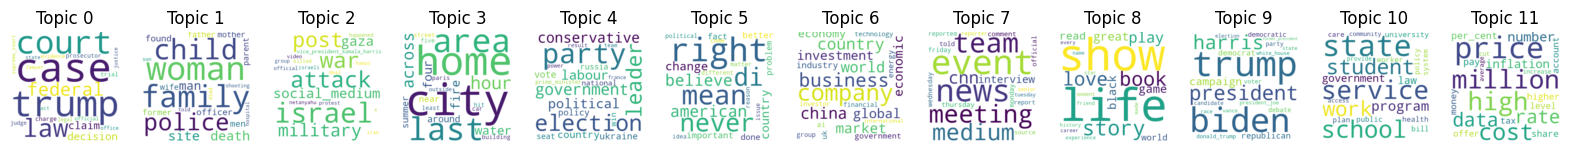

In [ ]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaMulticore
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import multiprocessing
from gensim.models.phrases import Phrases, Phraser
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset (update with your actual file path)
df = pd.read_csv("../datasets/news_dataset_content_cleaned.csv")  # Replace with actual file path

# Convert content_words column (assumed to be list-like) into a list of tokenized words
df['content_words'] = df['content_words'].apply(eval)  # Ensure the column is in list format

# 1. Detect Bigrams and Trigrams with Higher Threshold
bigram = Phrases(df['content_words'], min_count=10, threshold=30)  # Increased min_count and threshold
trigram = Phrases(bigram[df['content_words']], min_count=10, threshold=30)

bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# Apply bigrams and trigrams
df['content_words'] = df['content_words'].apply(lambda x: trigram_mod[bigram_mod[x]])

# 2. Remove Low-Information Words (Expanded Stopwords List)
custom_stopwords = set([
    "said", "one", "new", "people", "like", "time", "year", "just", "know", "think", "make", "get", "also",
    "many", "day", "week", "month", "even", "still", "back", "see", "way", "want", "need", "thing", "go",
    "use", "give", "first", "two", "three", "take", "since", "well", "much", "could", "should", "would", 
    "question", "statement", "really", "going", "u", "best", "lot", "good", "far", "added", "got", "may",
    "according", "might", "whether", "say", "look", "always", "let", "yet", "asked", "across", "never",
    "di", "mean"
])
df['content_words'] = df['content_words'].apply(lambda x: [word for word in x if word not in custom_stopwords])

# 3. Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['content_words'])

# 4. Filter out extreme tokens (Higher no_below to remove rare words)
dictionary.filter_extremes(no_below=20, no_above=0.3, keep_n=10000)  # Increased no_below from 10 to 20

# 5. Convert to Bag-of-Words format
corpus = [dictionary.doc2bow(text) for text in df['content_words']]

# 6. Train LDA Model Using MULTICORE Processing
num_topics = 12
lda_model = LdaMulticore(
    corpus=corpus, 
    num_topics=num_topics, 
    id2word=dictionary, 
    passes=10,  # Increased passes for better convergence
    workers=multiprocessing.cpu_count(),  # Use all available CPU cores
    random_state=42
)

# 7. Compute LDA Coherence Score
coherence_model = CoherenceModel(model=lda_model, texts=df['content_words'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"LDA Coherence Score: {coherence_score:.4f}")

# 8. Print the top words in each topic
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx}: {topic}\n")

# 9. Visualize topics using WordClouds
fig, axes = plt.subplots(1, num_topics, figsize=(20, 5))
for i, ax in enumerate(axes):
    topic_words = dict(lda_model.show_topic(i, 20))
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(topic_words)
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"Topic {i}")
plt.show()

# 10. Save the model and dictionary
lda_model.save("lda_model.model")
dictionary.save("lda_dictionary.dict")

# Might be the best? (2) -> 2nd Highest Coherence Score.  I feel that this worcloud is the BEST to differentiate each topic (?)

Might be one of the best wordcloud for each topic? As in te word inside the wordcloud is meaningful to represent a topic?
 
In this code, i DID NOT consider "di" and "mean" as a list of expanded stopwords (apart from the one we import from nltk module).
do you think "di" and "mean" should be considered as stopwords? 

Note: 
Idk why but if i did not consider "di" and "mean" as a stopword, the coherence score become higher

LDA Coherence Score: 0.5822
Topic 0: 0.025*"case" + 0.021*"trump" + 0.018*"court" + 0.010*"decision" + 0.010*"federal" + 0.009*"law" + 0.009*"claim" + 0.009*"charge" + 0.008*"trial" + 0.008*"prosecutor"

Topic 1: 0.021*"family" + 0.020*"woman" + 0.015*"child" + 0.011*"police" + 0.009*"site" + 0.009*"man" + 0.009*"death" + 0.008*"men" + 0.007*"officer" + 0.007*"found"

Topic 2: 0.020*"israel" + 0.014*"war" + 0.013*"attack" + 0.012*"official" + 0.012*"ukraine" + 0.012*"post" + 0.011*"military" + 0.010*"russia" + 0.009*"social_medium" + 0.008*"gaza"

Topic 3: 0.016*"city" + 0.014*"home" + 0.011*"last" + 0.009*"area" + 0.008*"hour" + 0.006*"water" + 0.006*"across" + 0.006*"fire" + 0.006*"four" + 0.005*"around"

Topic 4: 0.032*"party" + 0.026*"election" + 0.018*"leader" + 0.017*"government" + 0.016*"policy" + 0.015*"conservative" + 0.014*"political" + 0.013*"labour" + 0.012*"vote" + 0.009*"country"

Topic 5: 0.012*"right" + 0.008*"mean" + 0.008*"di" + 0.008*"never" + 0.007*"believe" + 0.007

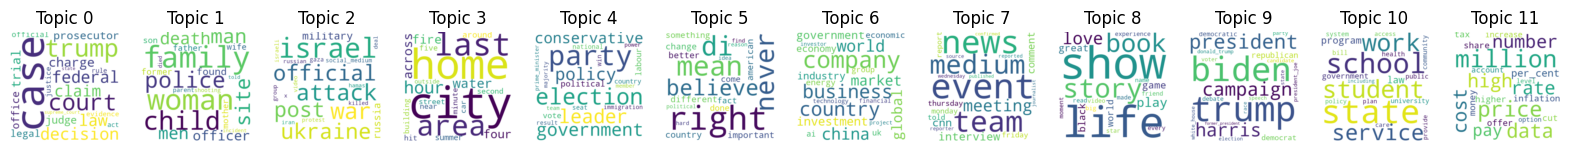

In [24]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaMulticore
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import multiprocessing
from gensim.models.phrases import Phrases, Phraser
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset (update with your actual file path)
df = pd.read_csv("../datasets/news_dataset_content_cleaned.csv")  # Replace with actual file path

# Convert content_words column (assumed to be list-like) into a list of tokenized words
df['content_words'] = df['content_words'].apply(eval)  # Ensure the column is in list format

# 1. Detect Bigrams and Trigrams with Higher Threshold
bigram = Phrases(df['content_words'], min_count=10, threshold=30)  # Increased min_count and threshold
trigram = Phrases(bigram[df['content_words']], min_count=10, threshold=30)

bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# Apply bigrams and trigrams
df['content_words'] = df['content_words'].apply(lambda x: trigram_mod[bigram_mod[x]])

# 2. Remove Low-Information Words (Expanded Stopwords List)
custom_stopwords = set([
     "said", "one", "new", "people", "like", "time", "year", "just", "know", "think", "make", "get", "also",
    "many", "day", "week", "month", "even", "still", "back", "see", "way", "want", "need", "thing", "go",
    "use", "give", "first", "two", "three", "take", "since", "well", "much", "could", "should", "would", 
    "question", "statement", "really", "going", "u", "best", "lot", "good", "far", "added", "got", "may",
    "according", "might", "whether", "say", "look", "always", "let", "yet", "asked"
])

df['content_words'] = df['content_words'].apply(lambda x: [word for word in x if word not in custom_stopwords])

# 3. Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['content_words'])

# 4. Filter out extreme tokens (Higher no_below to remove rare words)
dictionary.filter_extremes(no_below=20, no_above=0.25, keep_n=10000)  # Increased no_below from 10 to 20

# 5. Convert to Bag-of-Words format
corpus = [dictionary.doc2bow(text) for text in df['content_words']]

# 6. Train LDA Model Using MULTICORE Processing
num_topics = 12
lda_model = LdaMulticore(
    corpus=corpus, 
    num_topics=num_topics, 
    id2word=dictionary, 
    passes=15,  # Increased passes for better convergence
    workers=multiprocessing.cpu_count(),  # Use all available CPU cores
    random_state=42
)

# 7. Compute LDA Coherence Score
coherence_model = CoherenceModel(model=lda_model, texts=df['content_words'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"LDA Coherence Score: {coherence_score:.4f}")

# 8. Print the top words in each topic
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx}: {topic}\n")

# 9. Visualize topics using WordClouds
fig, axes = plt.subplots(1, num_topics, figsize=(20, 5))
for i, ax in enumerate(axes):
    topic_words = dict(lda_model.show_topic(i, 20))
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(topic_words)
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"Topic {i}")
plt.show()

# 10. Save the model and dictionary
lda_model.save("lda_model.model")
dictionary.save("lda_dictionary.dict")

# Might be the best? (3) -> 3RD Highest Coherence Score. I feel that this wordcloud is also the BEST to differentiate each topic (?), actually the result seems has no much difference with the previous try. but this one not the highest coherence score

Might be one of the best wordcloud for each topic? As in te word inside the wordcloud is meaningful to represent a topic?

In this code, i CONSIDER "di" and "mean" as a list of expanded stopwords (apart from the one we import from nltk module).
do you think "di" and "mean" should be considered as stopwords? 

Note: 
Idk why but if i did not consider "di" and "mean" as a stopword, the coherence score become higher

LDA Coherence Score: 0.5626
Topic 0: 0.027*"case" + 0.024*"trump" + 0.019*"court" + 0.010*"federal" + 0.010*"decision" + 0.010*"claim" + 0.009*"charge" + 0.009*"trial" + 0.008*"prosecutor" + 0.008*"judge"

Topic 1: 0.012*"police" + 0.009*"site" + 0.009*"death" + 0.009*"found" + 0.009*"report" + 0.008*"information" + 0.007*"officer" + 0.007*"health" + 0.007*"investigation" + 0.006*"hospital"

Topic 2: 0.016*"video" + 0.016*"post" + 0.014*"wrote" + 0.013*"social_medium" + 0.012*"vice_president_kamala_harris" + 0.009*"online" + 0.009*"x" + 0.009*"shared" + 0.008*"platform" + 0.008*"happened"

Topic 3: 0.016*"city" + 0.013*"home" + 0.009*"last" + 0.008*"area" + 0.008*"million" + 0.008*"hour" + 0.007*"july" + 0.006*"across" + 0.006*"four" + 0.006*"water"

Topic 4: 0.021*"party" + 0.016*"election" + 0.015*"israel" + 0.014*"government" + 0.014*"leader" + 0.012*"conservative" + 0.011*"labour" + 0.010*"country" + 0.010*"war" + 0.009*"official"

Topic 5: 0.016*"right" + 0.011*"country" + 0.009*"

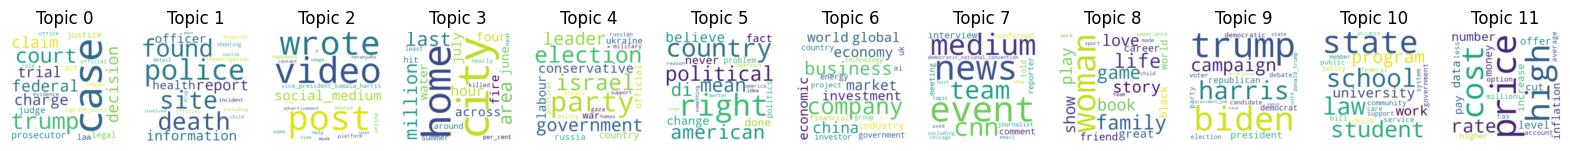

In [15]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaMulticore
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import multiprocessing
from gensim.models.phrases import Phrases, Phraser
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset (update with your actual file path)
df = pd.read_csv("../datasets/news_dataset_content_cleaned.csv")  # Replace with actual file path

# Convert content_words column (assumed to be list-like) into a list of tokenized words
df['content_words'] = df['content_words'].apply(eval)  # Ensure the column is in list format

# 1. Detect Bigrams and Trigrams with Higher Threshold
bigram = Phrases(df['content_words'], min_count=10, threshold=30)  # Increased min_count and threshold
trigram = Phrases(bigram[df['content_words']], min_count=10, threshold=30)

bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# Apply bigrams and trigrams
df['content_words'] = df['content_words'].apply(lambda x: trigram_mod[bigram_mod[x]])

# 2. Remove Low-Information Words (Expanded Stopwords List)
custom_stopwords = set([
    "said", "one", "new", "people", "like", "time", "year", "just", "know", "think", "make", "get", "also",
    "many", "day", "week", "month", "even", "still", "back", "see", "way", "want", "need", "thing", "go",
    "use", "give", "first", "two", "three", "take", "since", "well", "much", "could", "should", "would", 
    "question", "statement", "really", "going", "u", "best", "lot", "good", "far", "added", "got", "may",
    "according", "might", "whether", "say", "look", "always", "let", "yet", "asked", "di", "mean"
])
df['content_words'] = df['content_words'].apply(lambda x: [word for word in x if word not in custom_stopwords])

# 3. Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['content_words'])

# 4. Filter out extreme tokens (Higher no_below to remove rare words)
dictionary.filter_extremes(no_below=20, no_above=0.2, keep_n=10000)  # Increased no_below from 10 to 20

# 5. Convert to Bag-of-Words format
corpus = [dictionary.doc2bow(text) for text in df['content_words']]

# 6. Train LDA Model Using MULTICORE Processing
num_topics = 12
lda_model = LdaMulticore(
    corpus=corpus, 
    num_topics=num_topics, 
    id2word=dictionary, 
    passes=10,  # Increased passes for better convergence
    workers=multiprocessing.cpu_count(),  # Use all available CPU cores
    random_state=42
)

# 7. Compute LDA Coherence Score
coherence_model = CoherenceModel(model=lda_model, texts=df['content_words'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"LDA Coherence Score: {coherence_score:.4f}")

# 8. Print the top words in each topic
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx}: {topic}\n")

# 9. Visualize topics using WordClouds
fig, axes = plt.subplots(1, num_topics, figsize=(20, 5))
for i, ax in enumerate(axes):
    topic_words = dict(lda_model.show_topic(i, 20))
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(topic_words)
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"Topic {i}")
plt.show()

# 10. Save the model and dictionary
lda_model.save("lda_model.model")
dictionary.save("lda_dictionary.dict")

# Wah, i think this is one best of the best. But, this one i didnt include "good" as the stopword. 

But, if i didnt include "good" as the stopword, seems "good" didnt tell so much meaning inside the wordcloud isn't it? or should we just include it bcs it might suggest bias?

LDA Coherence Score: 0.5800
Topic 0: 0.021*"case" + 0.020*"state" + 0.015*"law" + 0.015*"court" + 0.011*"federal" + 0.007*"charge" + 0.007*"trial" + 0.007*"decision" + 0.007*"act" + 0.006*"legal"

Topic 1: 0.012*"service" + 0.009*"health" + 0.007*"offer" + 0.007*"used" + 0.007*"program" + 0.006*"online" + 0.006*"including" + 0.006*"help" + 0.006*"information" + 0.006*"system"

Topic 2: 0.017*"show" + 0.011*"news" + 0.010*"video" + 0.008*"book" + 0.008*"post" + 0.008*"story" + 0.007*"game" + 0.006*"read" + 0.006*"play" + 0.005*"social_medium"

Topic 3: 0.014*"city" + 0.009*"police" + 0.009*"home" + 0.007*"hour" + 0.006*"area" + 0.006*"four" + 0.005*"last" + 0.005*"later" + 0.005*"fire" + 0.005*"event"

Topic 4: 0.031*"policy" + 0.022*"government" + 0.016*"however" + 0.015*"change" + 0.010*"per_cent" + 0.010*"plan" + 0.010*"report" + 0.008*"uk" + 0.007*"last_year" + 0.007*"economic"

Topic 5: 0.021*"million" + 0.016*"price" + 0.014*"high" + 0.012*"cost" + 0.011*"rate" + 0.010*"market" + 

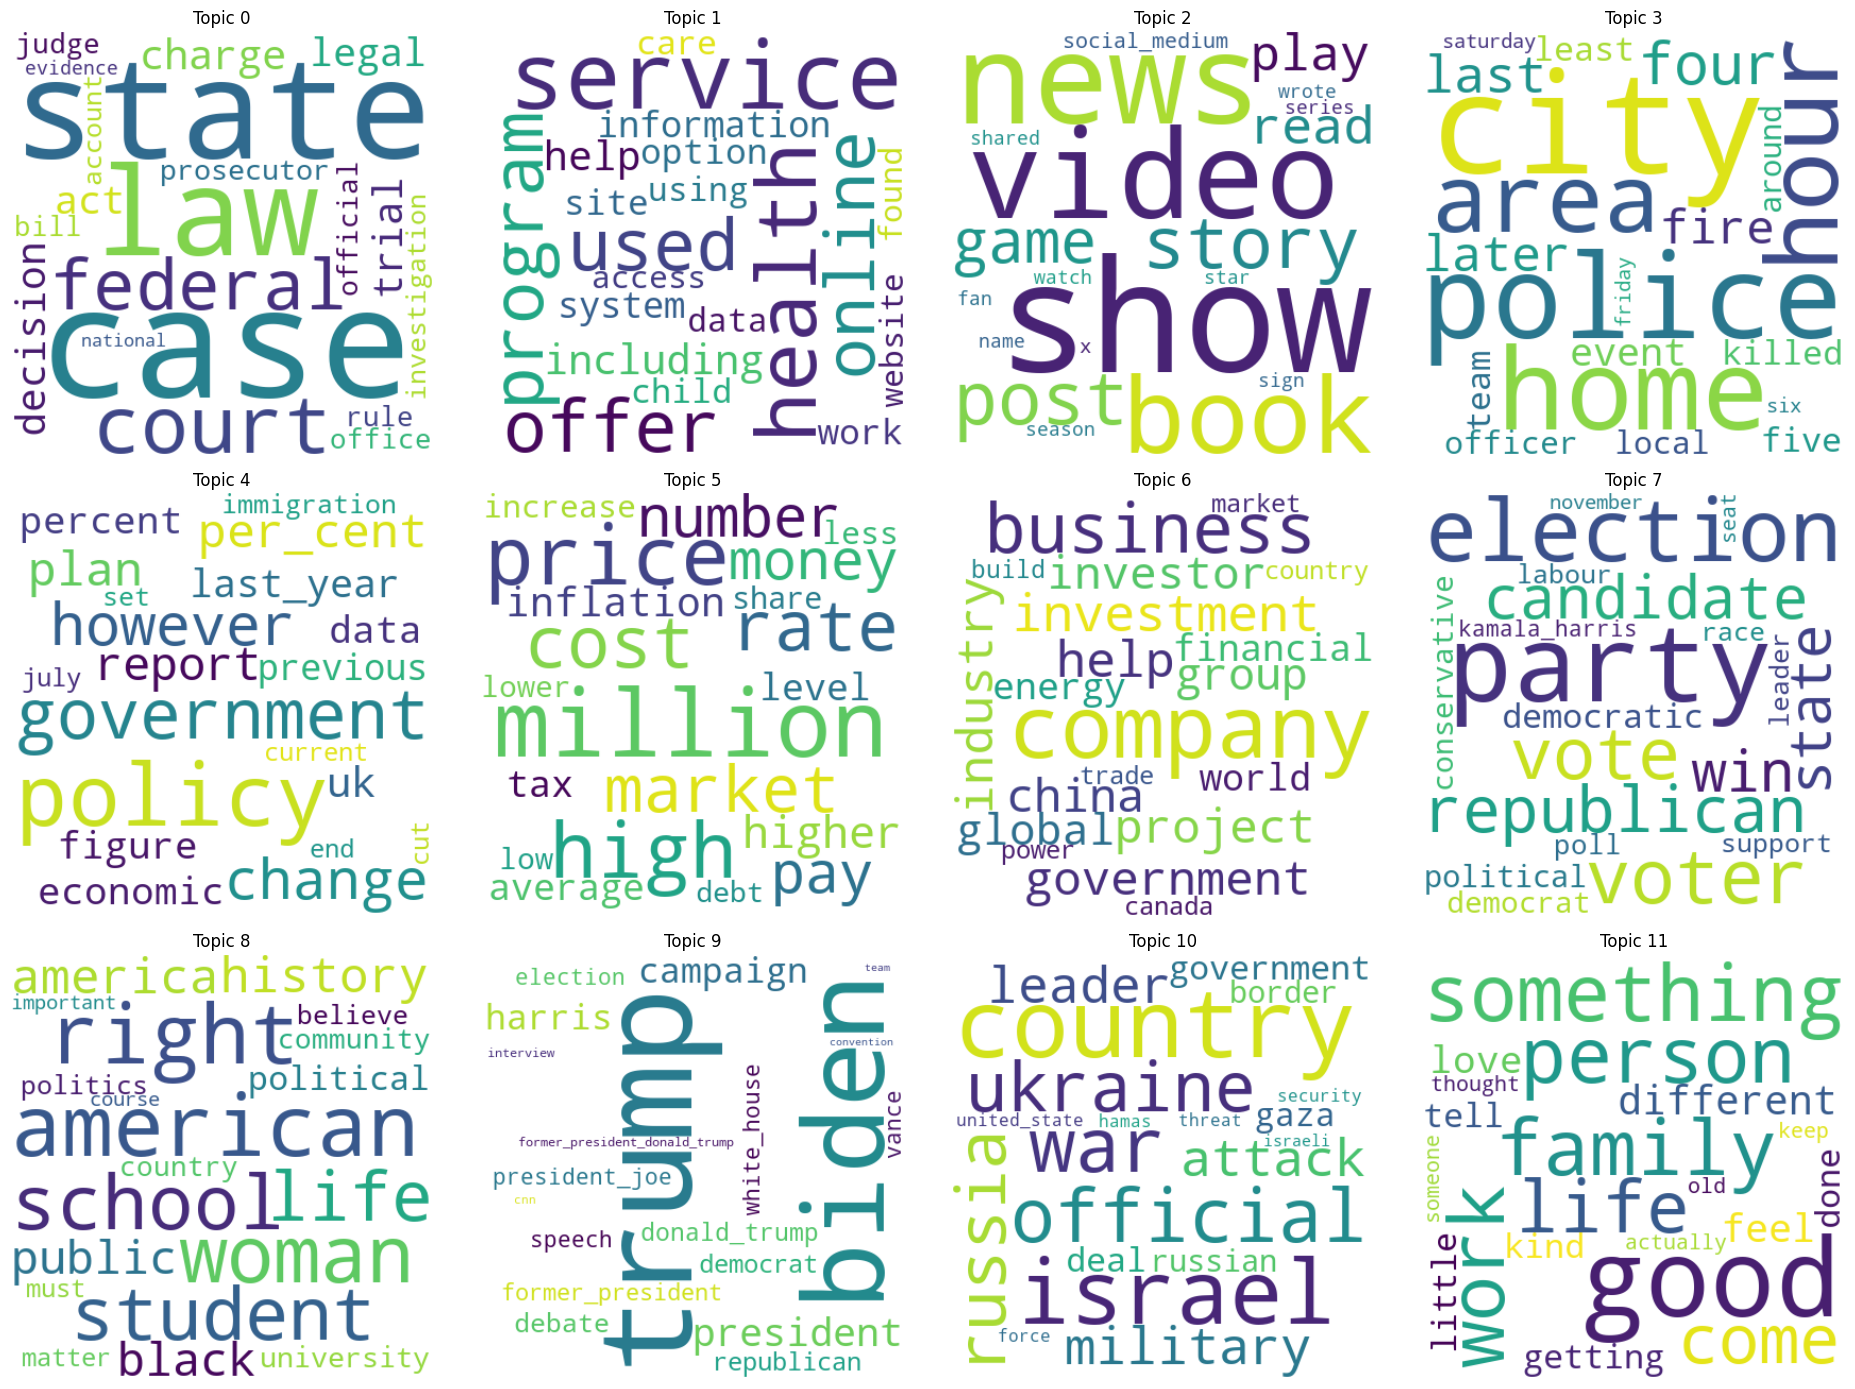

/var/folders/22/n8tb9vrd6qd6z19ygxj117tr0000gn/T/ipykernel_41393/2629248079.py:88: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", num_topics)  # Use a colormap with different colors


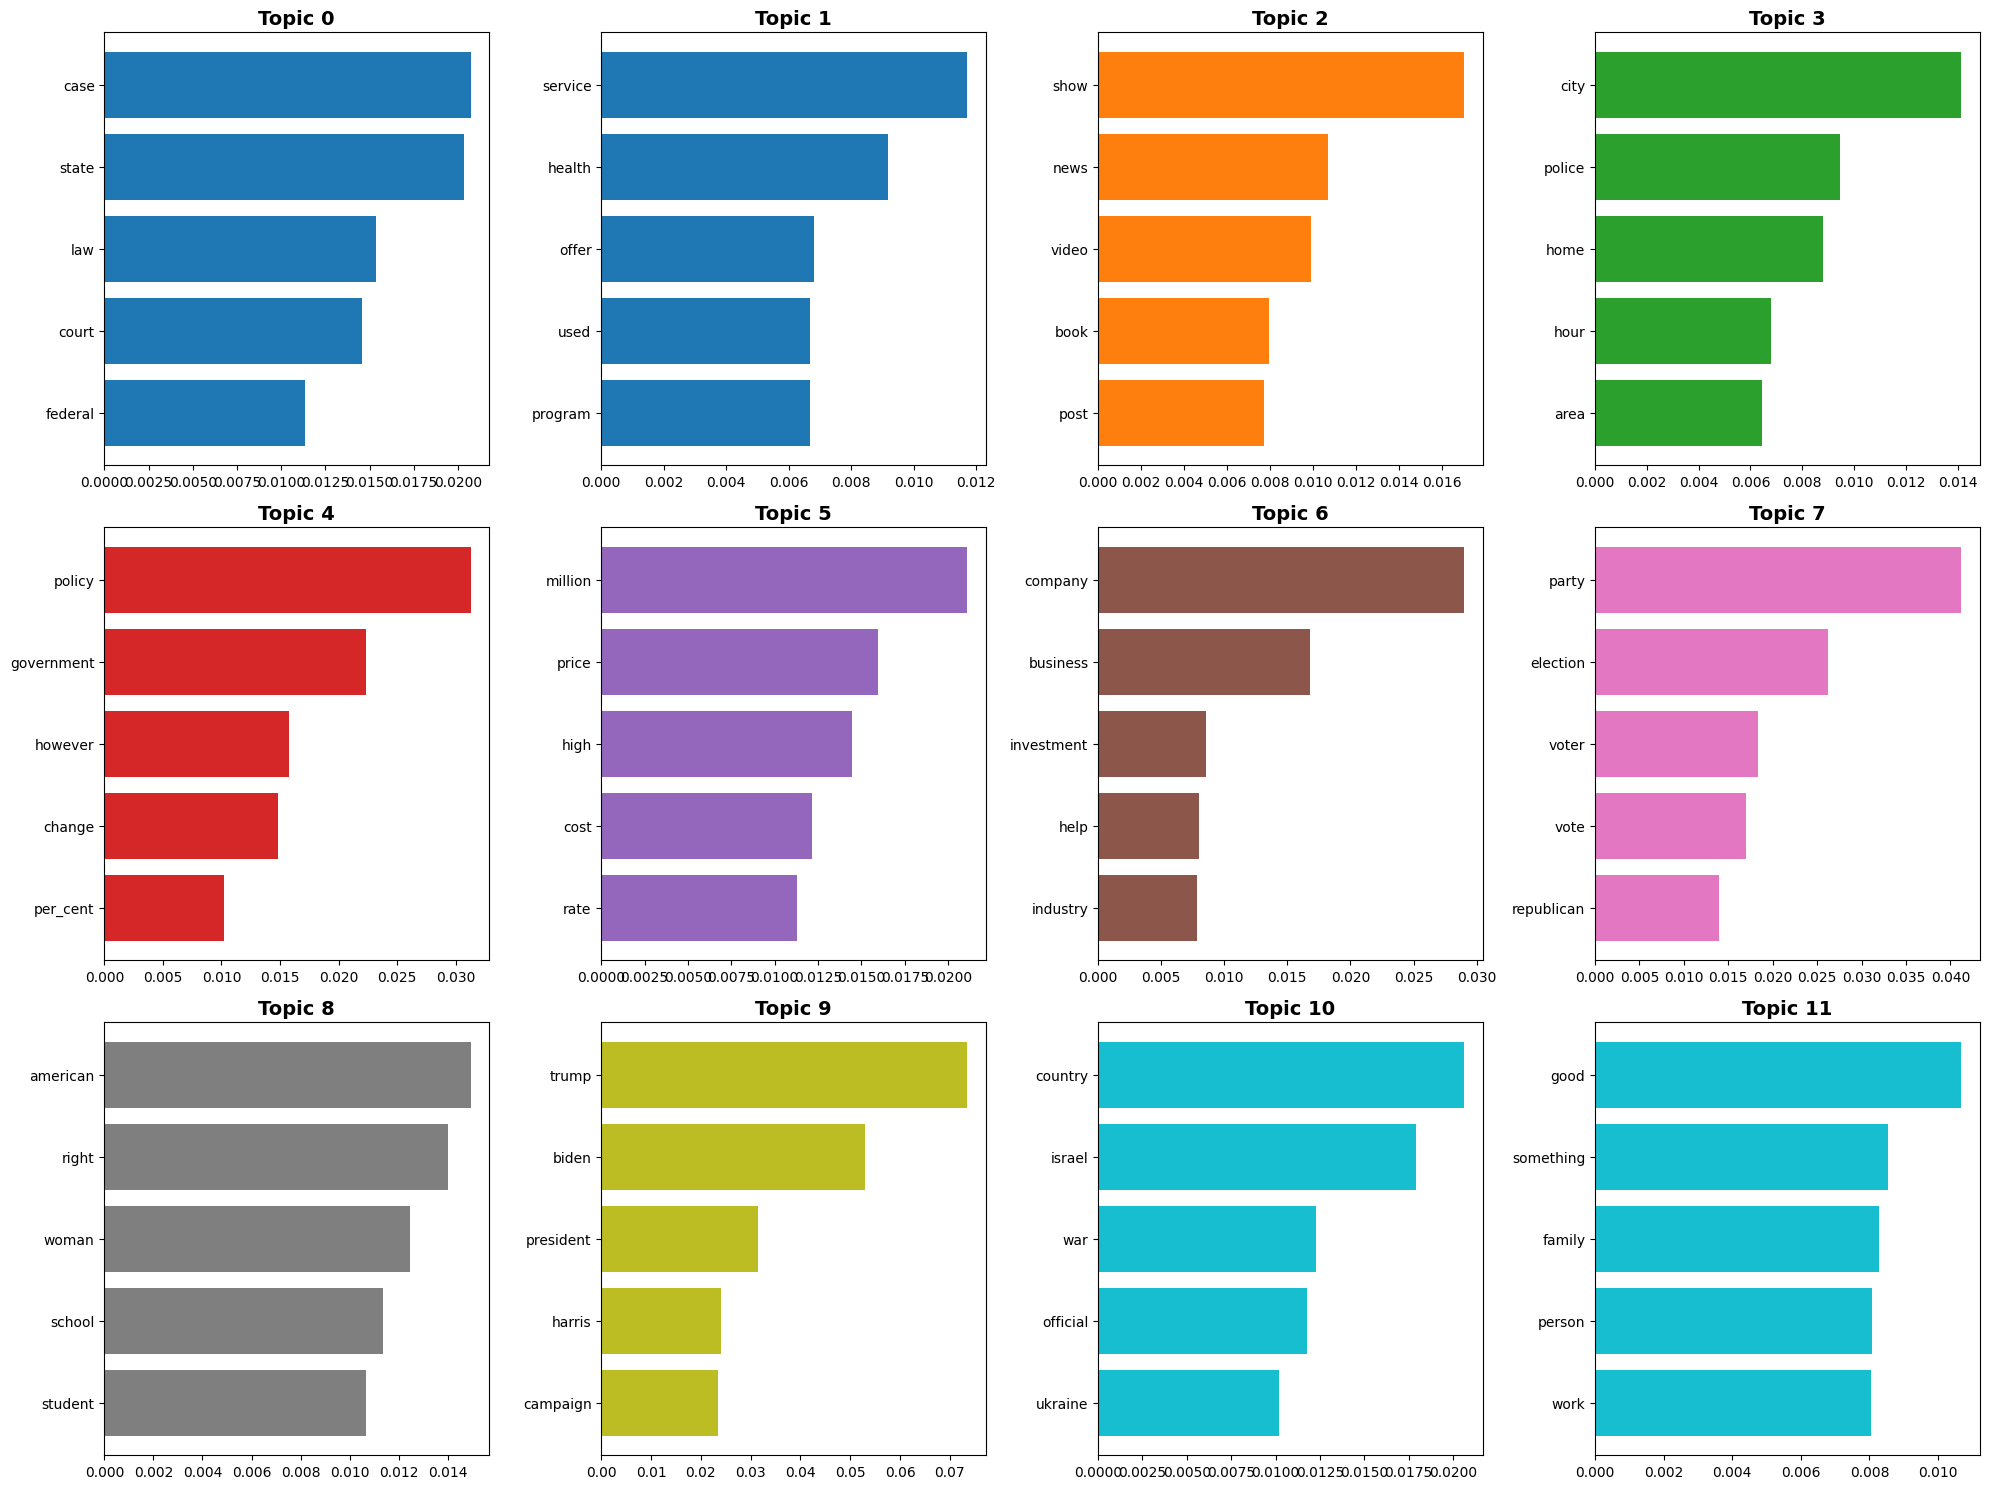

In [2]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaMulticore
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import multiprocessing
from gensim.models.phrases import Phrases, Phraser
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Load dataset (update with your actual file path)
df = pd.read_csv("../datasets/news_dataset_content_cleaned.csv")  # Replace with actual file path

# Convert content_words column (assumed to be list-like) into a list of tokenized words
df['content_words'] = df['content_words'].apply(eval)  # Ensure the column is in list format

# 1. Detect Bigrams and Trigrams with Higher Threshold
bigram = Phrases(df['content_words'], min_count=10, threshold=30)  # Increased min_count and threshold
trigram = Phrases(bigram[df['content_words']], min_count=10, threshold=30)

bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# Apply bigrams and trigrams
df['content_words'] = df['content_words'].apply(lambda x: trigram_mod[bigram_mod[x]])

# 2. Remove Low-Information Words (Expanded Stopwords List)
custom_stopwords = set([
    "said", "one", "new", "people", "like", "time", "year", "just", "know", "think", "make", "get", "also",
    "many", "day", "week", "month", "even", "still", "back", "see", "way", "want", "need", "thing", "go",
    "use", "give", "first", "two", "three", "take", "since", "well", "much", "could", "should", "would", 
    "question", "statement", "really", "going", "u", "best", "lot", "far", "added", "got", "may",
    "according", "might", "whether", "say", "look", "always", "let", "yet", "asked", "across", "never",
    "di", "mean"
])
df['content_words'] = df['content_words'].apply(lambda x: [word for word in x if word not in custom_stopwords])

# 3. Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['content_words'])

# 4. Filter out extreme tokens (Higher no_below to remove rare words)
dictionary.filter_extremes(no_below=20, no_above=0.3, keep_n=10000)  # Increased no_below from 10 to 20

# 5. Convert to Bag-of-Words format
corpus = [dictionary.doc2bow(text) for text in df['content_words']]

# 6. Train LDA Model Using MULTICORE Processing
num_topics = 12
lda_model = LdaMulticore(
    corpus=corpus, 
    num_topics=num_topics, 
    id2word=dictionary, 
    passes=10,  # Increased passes for better convergence
    workers=multiprocessing.cpu_count(),  # Use all available CPU cores
    random_state=42
)

# 7. Compute LDA Coherence Score
coherence_model = CoherenceModel(model=lda_model, texts=df['content_words'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"LDA Coherence Score: {coherence_score:.4f}")

# 8. Print the top words in each topic
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx}: {topic}\n")

# 9. Visualize topics using WordClouds (4 topics per row, 3 rows)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(19, 14))
axes = axes.flatten()

for i in range(num_topics):
    topic_words = dict(lda_model.show_topic(i, 20))
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(topic_words)
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f"Topic {i}")

plt.tight_layout()
plt.show()

# 10. Save the model and dictionary
lda_model.save("lda_model.model")
dictionary.save("lda_dictionary.dict")

# 11. Generate Bar Chart for Top 5 Words in Each Topic with Differentiated Colors
colors = plt.cm.get_cmap("tab10", num_topics)  # Use a colormap with different colors
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i in range(num_topics):
    topic_words = dict(lda_model.show_topic(i, 5))  # Get top 5 words
    words = list(topic_words.keys())
    values = list(topic_words.values())
    
    axes[i].barh(words, values, color=colors(i))  # Assign different colors to each topic
    axes[i].invert_yaxis()
    axes[i].set_title(f"Topic {i}", fontsize=14, fontweight='bold')
    
plt.tight_layout()
plt.show()


# this one same as above, but i include "good" inside the list of stopword 

1. here, the word "conservative", "republican" seems more stand out (?) 
2. the weird thing that might confusing for general ppl with minimum background knowledge is why kamala harris appear in topic 9 related to sport, but i search news in the internet and found out that she indeed like to visit usa olympiads etc etc. so might be bcs of this?

LDA Coherence Score: 0.5702
Topic 0: 0.012*"school" + 0.011*"policy" + 0.011*"work" + 0.008*"health" + 0.008*"student" + 0.008*"program" + 0.007*"system" + 0.007*"help" + 0.006*"community" + 0.006*"university"

Topic 1: 0.015*"family" + 0.013*"home" + 0.012*"child" + 0.010*"woman" + 0.006*"water" + 0.006*"away" + 0.006*"found" + 0.006*"around" + 0.006*"hour" + 0.005*"life"

Topic 2: 0.020*"state" + 0.017*"law" + 0.014*"case" + 0.013*"federal" + 0.013*"court" + 0.009*"government" + 0.009*"official" + 0.008*"rule" + 0.008*"act" + 0.008*"office"

Topic 3: 0.026*"trump" + 0.009*"post" + 0.008*"former" + 0.007*"video" + 0.007*"told" + 0.007*"trial" + 0.007*"interview" + 0.007*"comment" + 0.006*"police" + 0.006*"july"

Topic 4: 0.032*"election" + 0.032*"party" + 0.020*"political" + 0.016*"conservative" + 0.014*"labour" + 0.013*"vote" + 0.011*"decision" + 0.009*"right" + 0.009*"politics" + 0.009*"seat"

Topic 5: 0.046*"trump" + 0.046*"biden" + 0.027*"president" + 0.024*"campaign" + 0.023*"har

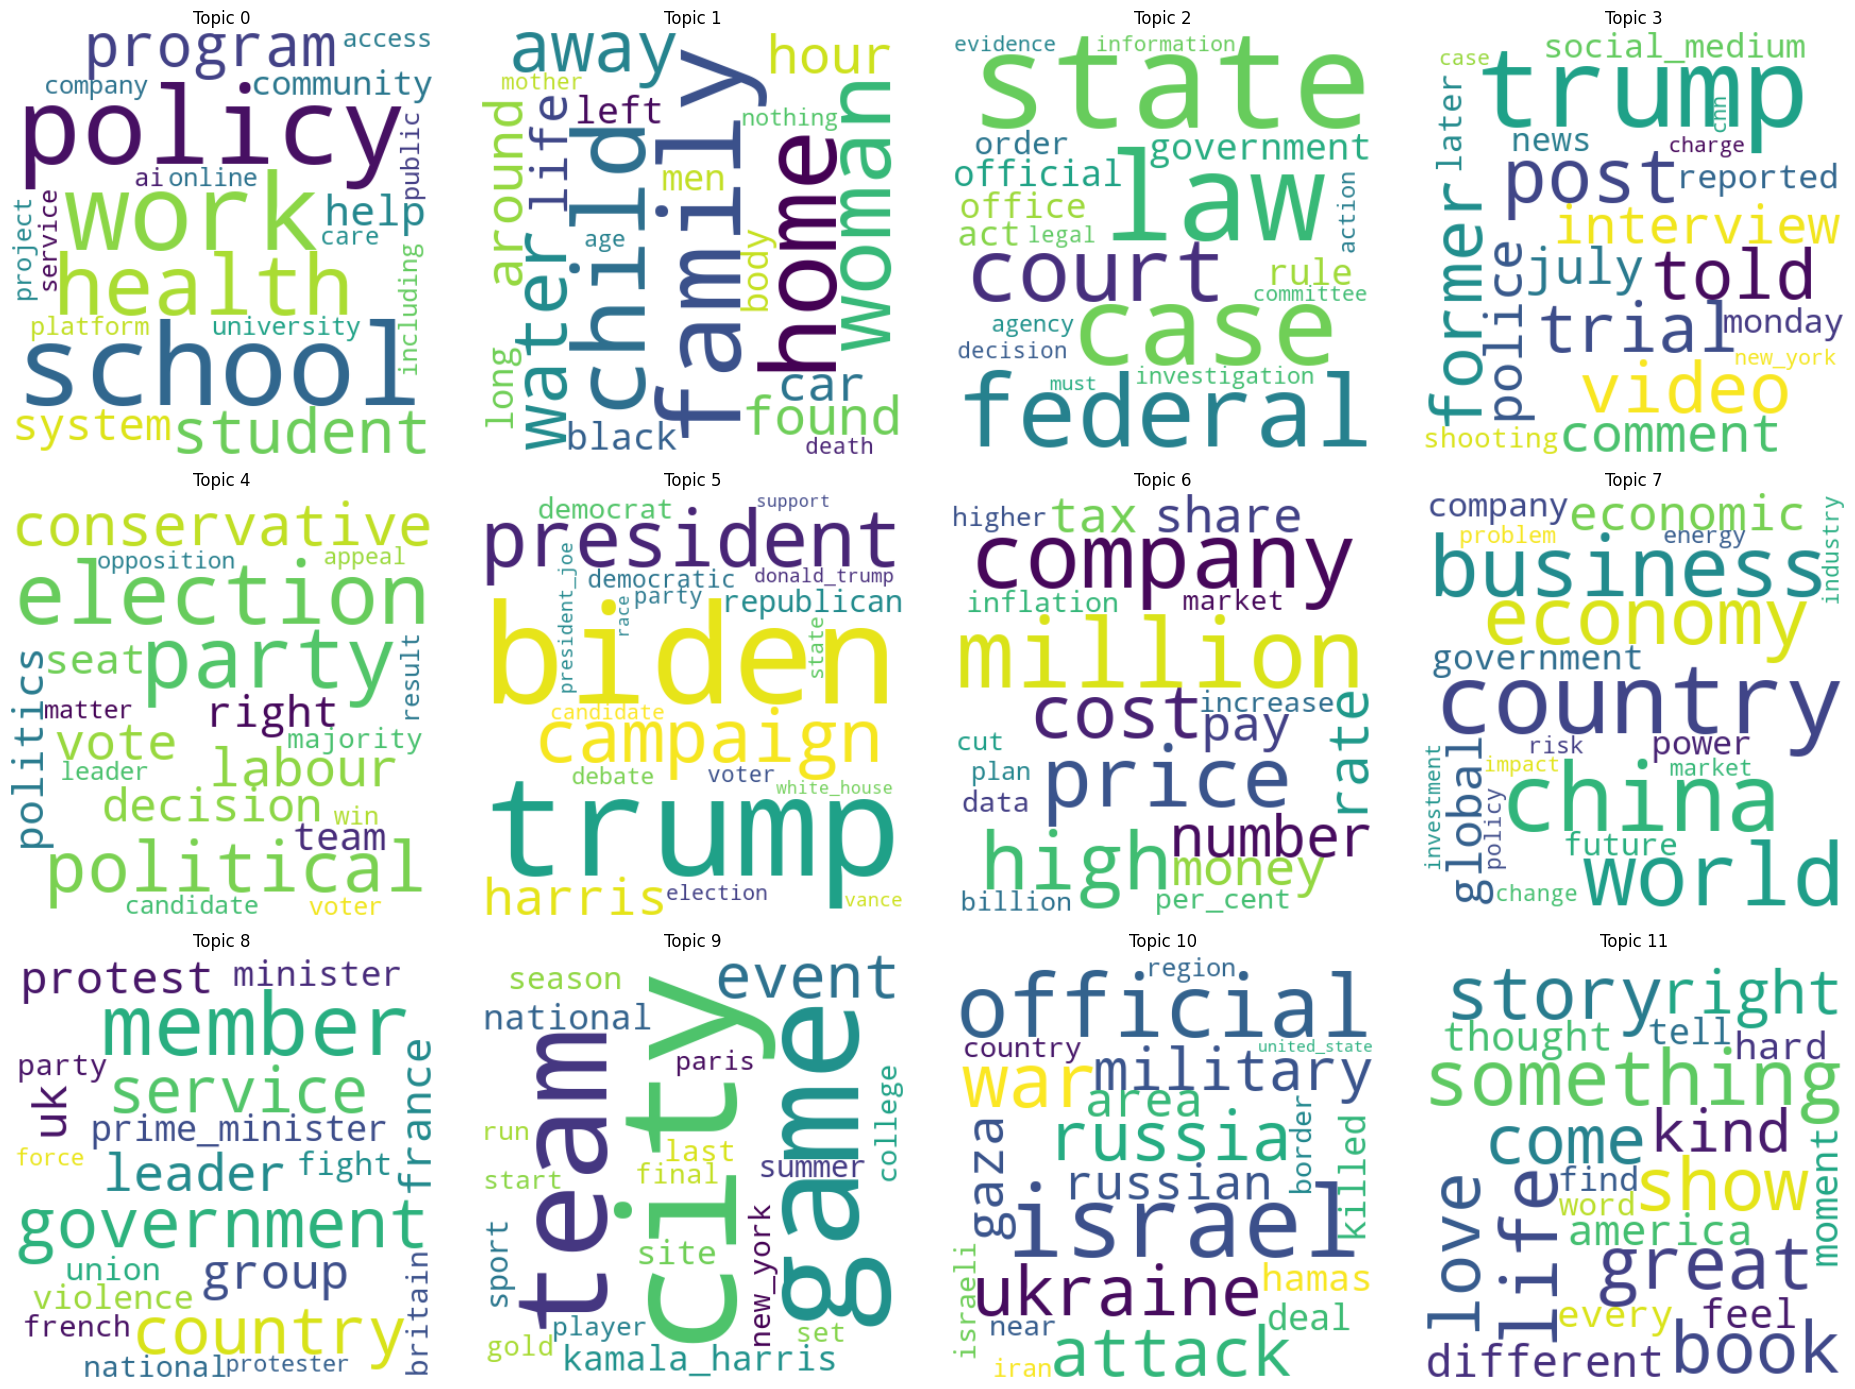

/var/folders/22/n8tb9vrd6qd6z19ygxj117tr0000gn/T/ipykernel_41393/3307471962.py:88: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", num_topics)  # Use a colormap with different colors


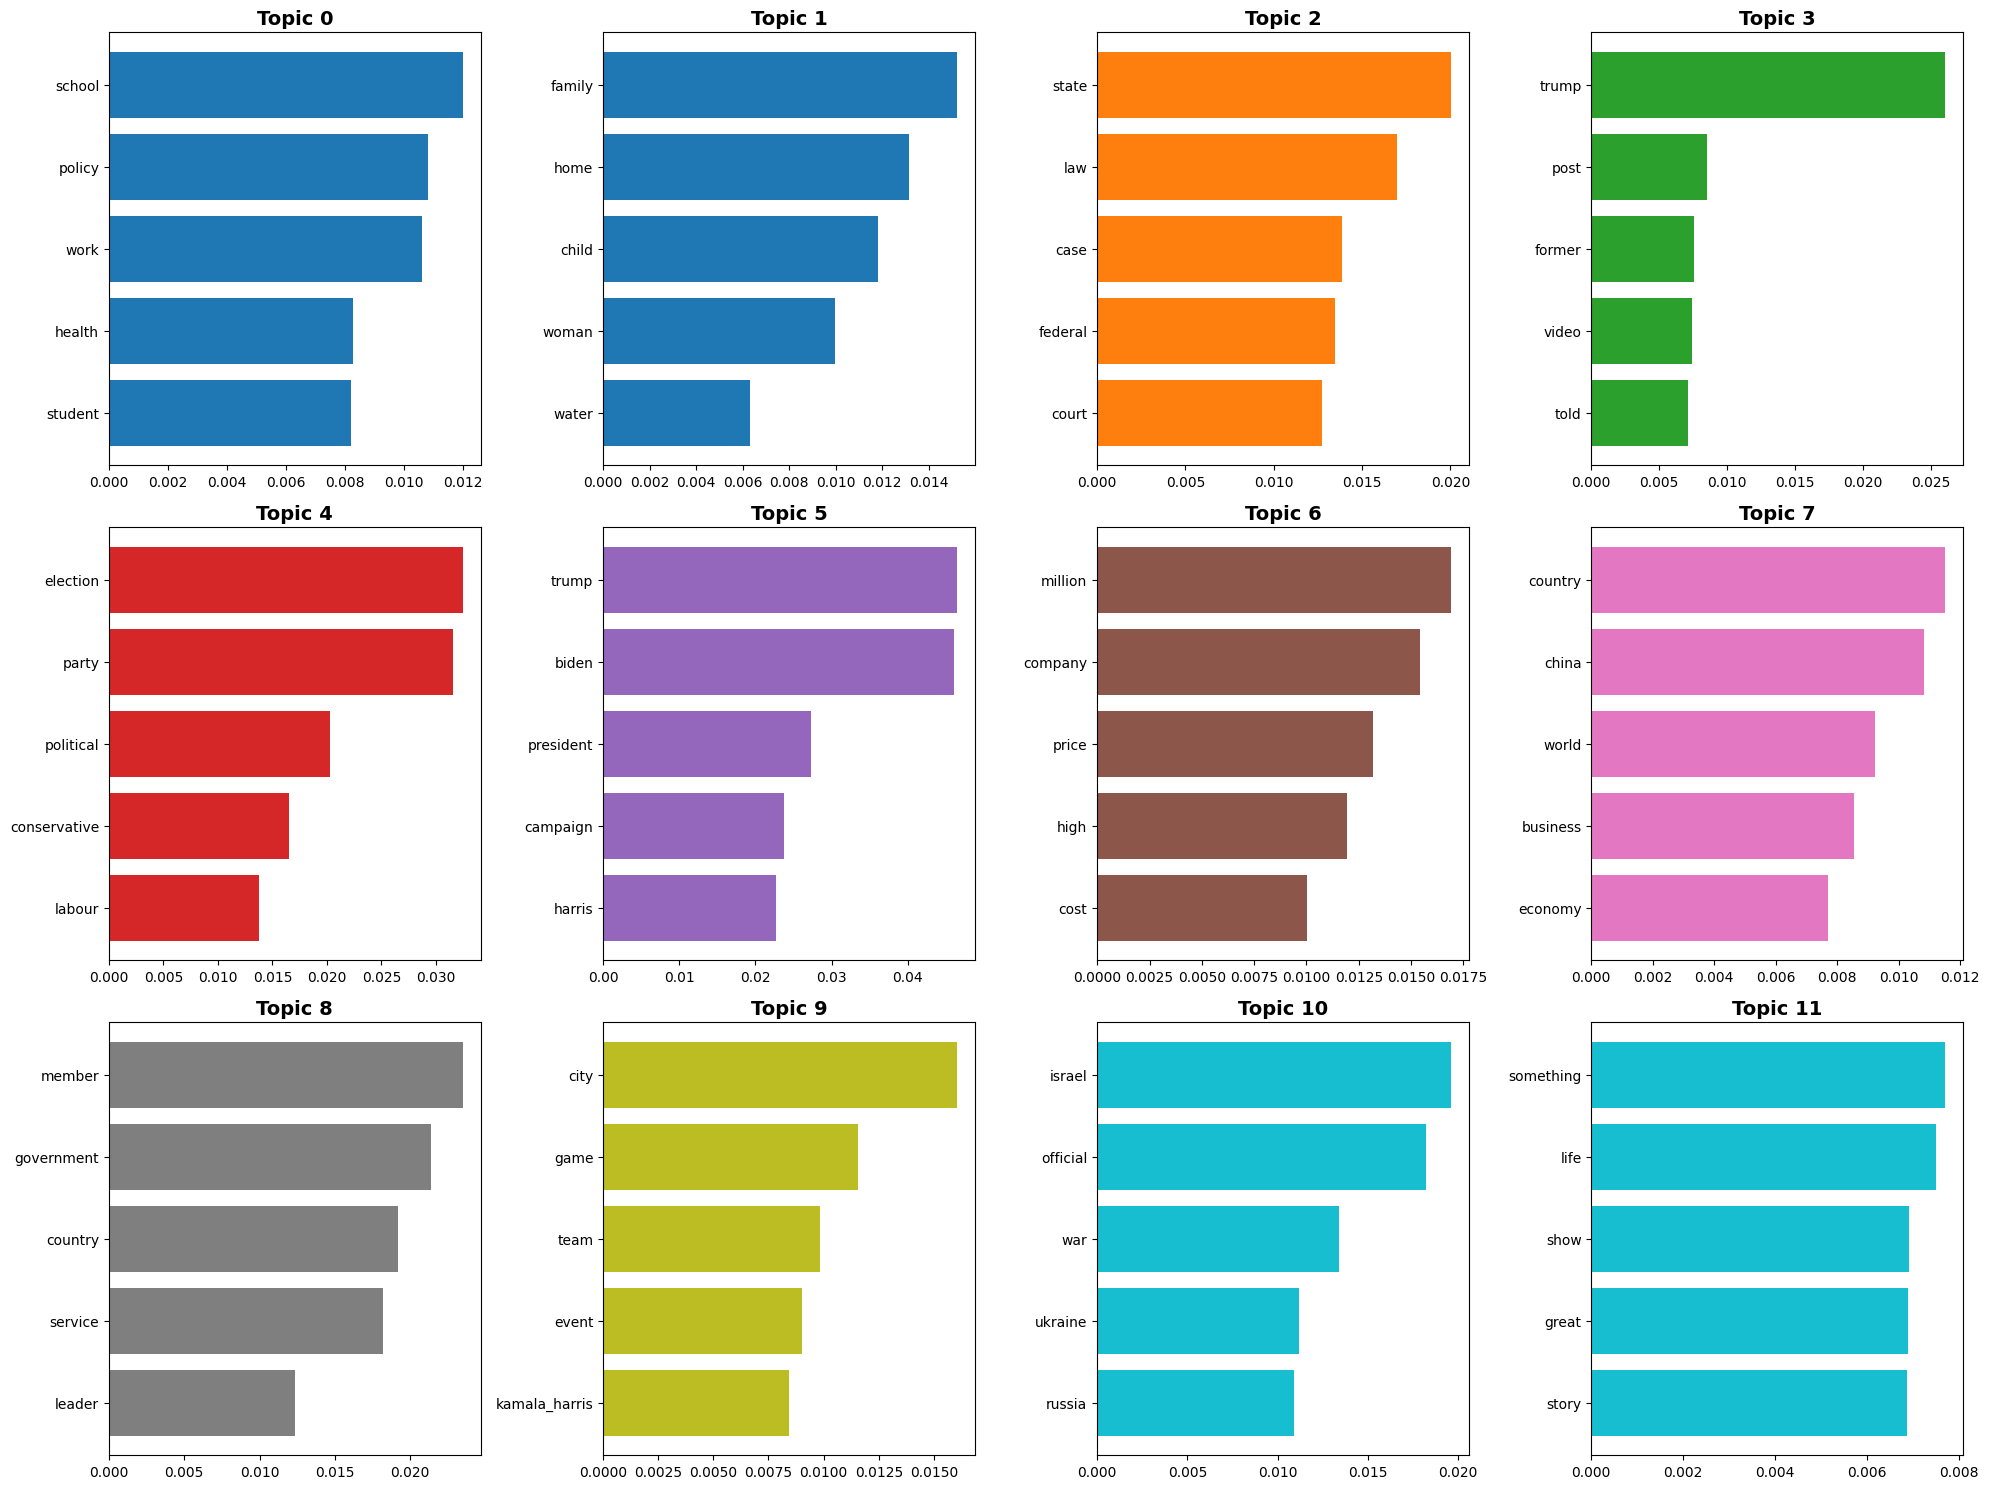

In [3]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaMulticore
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import multiprocessing
from gensim.models.phrases import Phrases, Phraser
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Load dataset (update with your actual file path)
df = pd.read_csv("../datasets/news_dataset_content_cleaned.csv")  # Replace with actual file path

# Convert content_words column (assumed to be list-like) into a list of tokenized words
df['content_words'] = df['content_words'].apply(eval)  # Ensure the column is in list format

# 1. Detect Bigrams and Trigrams with Higher Threshold
bigram = Phrases(df['content_words'], min_count=10, threshold=30)  # Increased min_count and threshold
trigram = Phrases(bigram[df['content_words']], min_count=10, threshold=30)

bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# Apply bigrams and trigrams
df['content_words'] = df['content_words'].apply(lambda x: trigram_mod[bigram_mod[x]])

# 2. Remove Low-Information Words (Expanded Stopwords List)
custom_stopwords = set([
    "said", "one", "new", "people", "like", "time", "year", "just", "know", "think", "make", "get", "also",
    "many", "day", "week", "month", "even", "still", "back", "see", "way", "want", "need", "thing", "go",
    "use", "give", "first", "two", "three", "take", "since", "well", "much", "could", "should", "would", 
    "question", "statement", "really", "going", "u", "best", "lot", "far", "good", "added", "got", "may",
    "according", "might", "whether", "say", "look", "always", "let", "yet", "asked", "across", "never",
    "di", "mean"
])
df['content_words'] = df['content_words'].apply(lambda x: [word for word in x if word not in custom_stopwords])

# 3. Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['content_words'])

# 4. Filter out extreme tokens (Higher no_below to remove rare words)
dictionary.filter_extremes(no_below=20, no_above=0.3, keep_n=10000)  # Increased no_below from 10 to 20

# 5. Convert to Bag-of-Words format
corpus = [dictionary.doc2bow(text) for text in df['content_words']]

# 6. Train LDA Model Using MULTICORE Processing
num_topics = 12
lda_model = LdaMulticore(
    corpus=corpus, 
    num_topics=num_topics, 
    id2word=dictionary, 
    passes=10,  # Increased passes for better convergence
    workers=multiprocessing.cpu_count(),  # Use all available CPU cores
    random_state=42
)

# 7. Compute LDA Coherence Score
coherence_model = CoherenceModel(model=lda_model, texts=df['content_words'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"LDA Coherence Score: {coherence_score:.4f}")

# 8. Print the top words in each topic
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx}: {topic}\n")

# 9. Visualize topics using WordClouds (4 topics per row, 3 rows)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(19, 14))
axes = axes.flatten()

for i in range(num_topics):
    topic_words = dict(lda_model.show_topic(i, 20))
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(topic_words)
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f"Topic {i}")

plt.tight_layout()
plt.show()

# 10. Save the model and dictionary
lda_model.save("lda_model.model")
dictionary.save("lda_dictionary.dict")

# 11. Generate Bar Chart for Top 5 Words in Each Topic with Differentiated Colors
colors = plt.cm.get_cmap("tab10", num_topics)  # Use a colormap with different colors
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i in range(num_topics):
    topic_words = dict(lda_model.show_topic(i, 5))  # Get top 5 words
    words = list(topic_words.keys())
    values = list(topic_words.values())
    
    axes[i].barh(words, values, color=colors(i))  # Assign different colors to each topic
    axes[i].invert_yaxis()
    axes[i].set_title(f"Topic {i}", fontsize=14, fontweight='bold')
    
plt.tight_layout()
plt.show()

# this one also can be best of the best. so i think we could just focus on last 3 wordcloud and choose 1 best and choose which one have the best topic separation. 

The difference is here i include "around" as a stopword. so u think we shld do this?

LDA Coherence Score: 0.5730
Topic 0: 0.022*"case" + 0.016*"court" + 0.013*"law" + 0.011*"decision" + 0.009*"trump" + 0.009*"federal" + 0.008*"charge" + 0.007*"trial" + 0.007*"legal" + 0.007*"prosecutor"

Topic 1: 0.012*"woman" + 0.009*"game" + 0.008*"black" + 0.008*"show" + 0.008*"great" + 0.007*"book" + 0.006*"play" + 0.006*"history" + 0.006*"world" + 0.005*"season"

Topic 2: 0.012*"help" + 0.011*"work" + 0.010*"service" + 0.008*"company" + 0.008*"system" + 0.008*"health" + 0.007*"school" + 0.007*"program" + 0.005*"including" + 0.005*"university"

Topic 3: 0.033*"government" + 0.021*"million" + 0.017*"plan" + 0.012*"policy" + 0.011*"deal" + 0.009*"pay" + 0.009*"tax" + 0.008*"uk" + 0.008*"billion" + 0.007*"money"

Topic 4: 0.046*"biden" + 0.030*"party" + 0.025*"president" + 0.020*"harris" + 0.019*"trump" + 0.012*"campaign" + 0.012*"election" + 0.011*"debate" + 0.011*"political" + 0.011*"democrat"

Topic 5: 0.010*"political" + 0.009*"view" + 0.008*"politics" + 0.007*"social_medium" + 0.

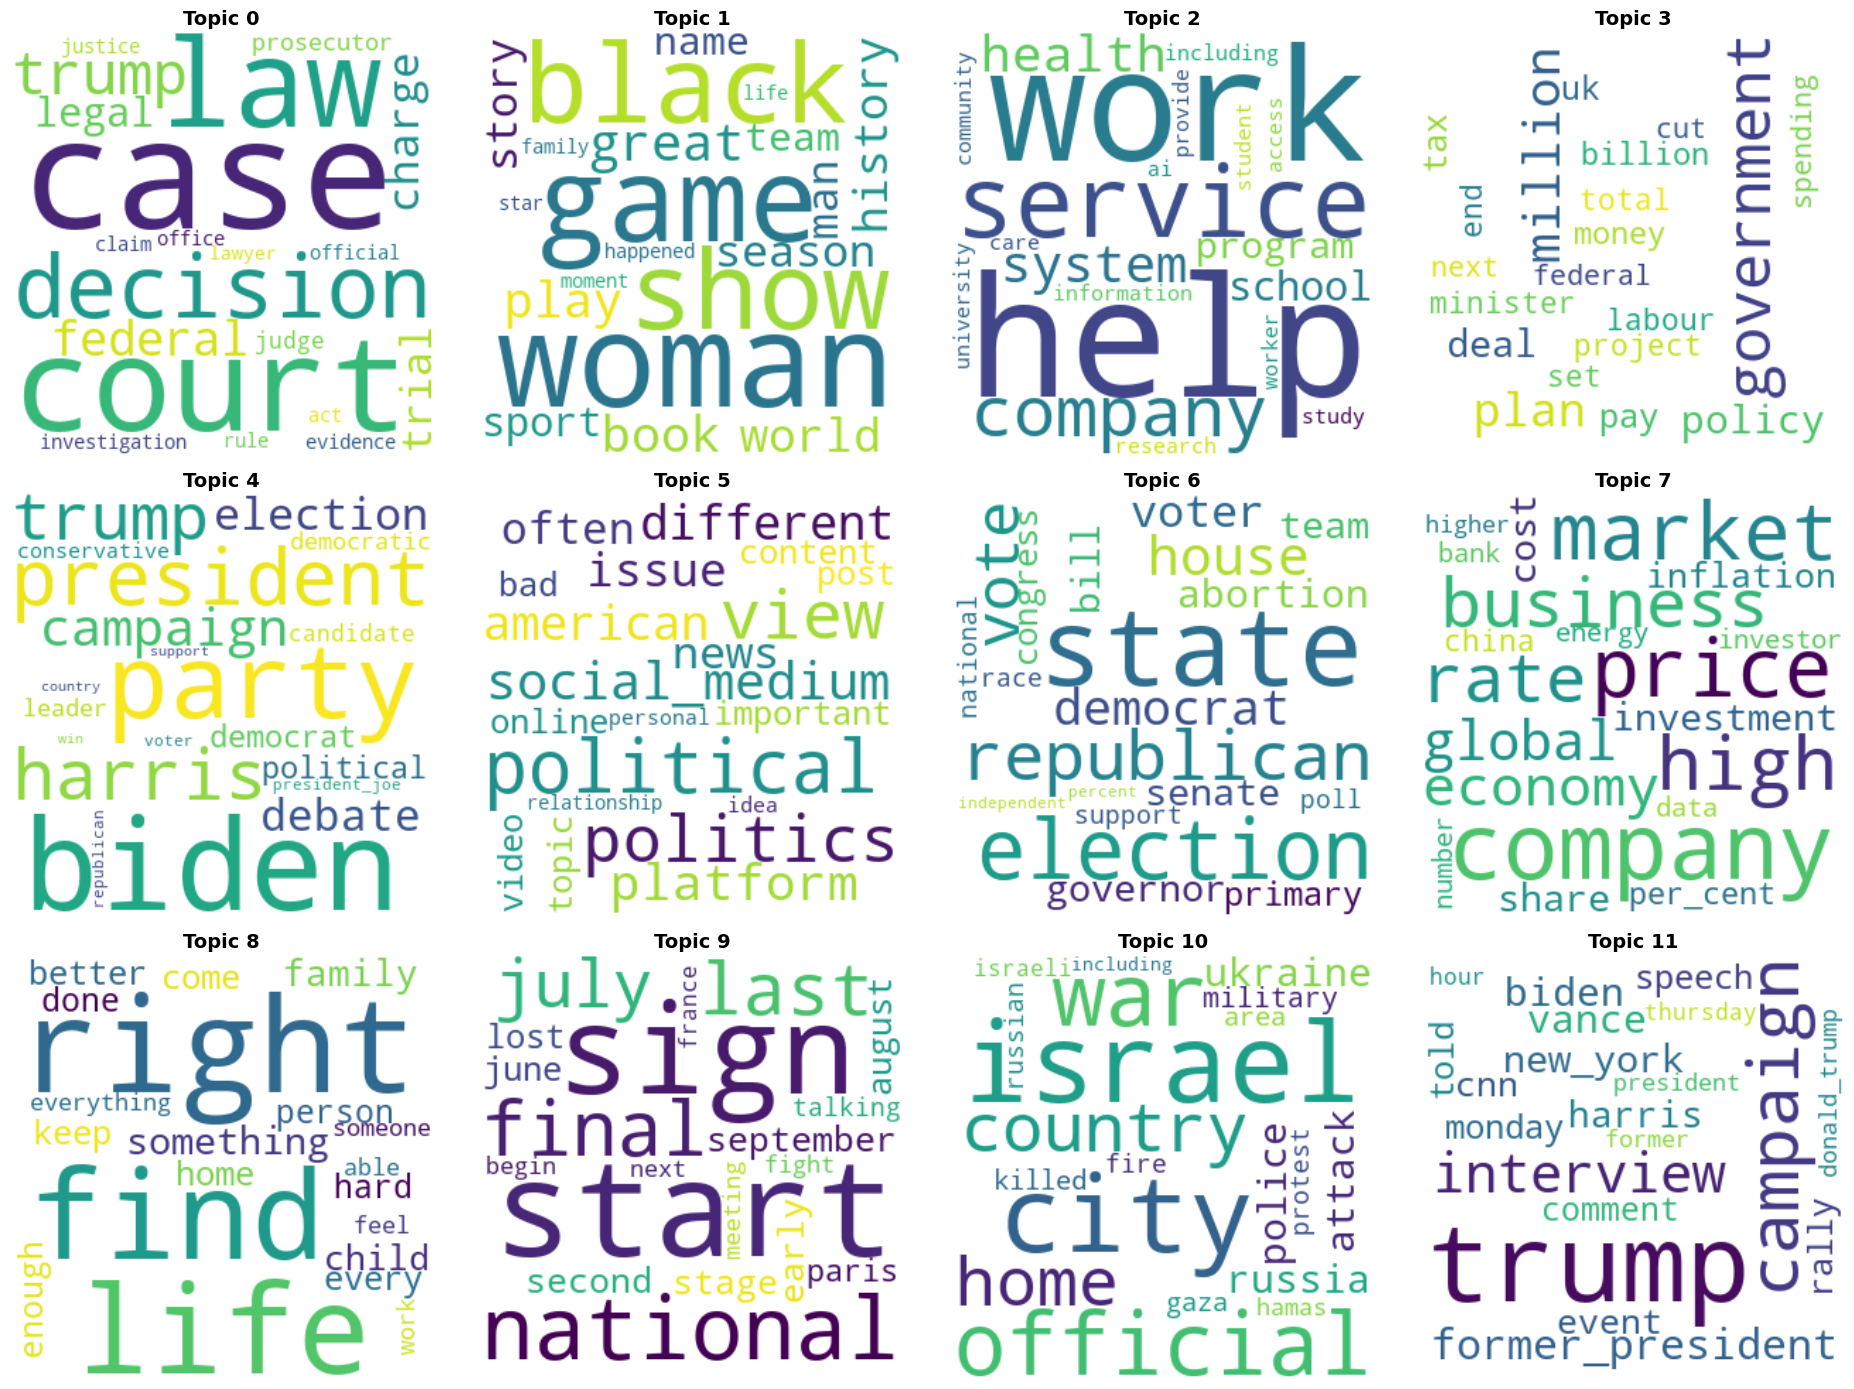

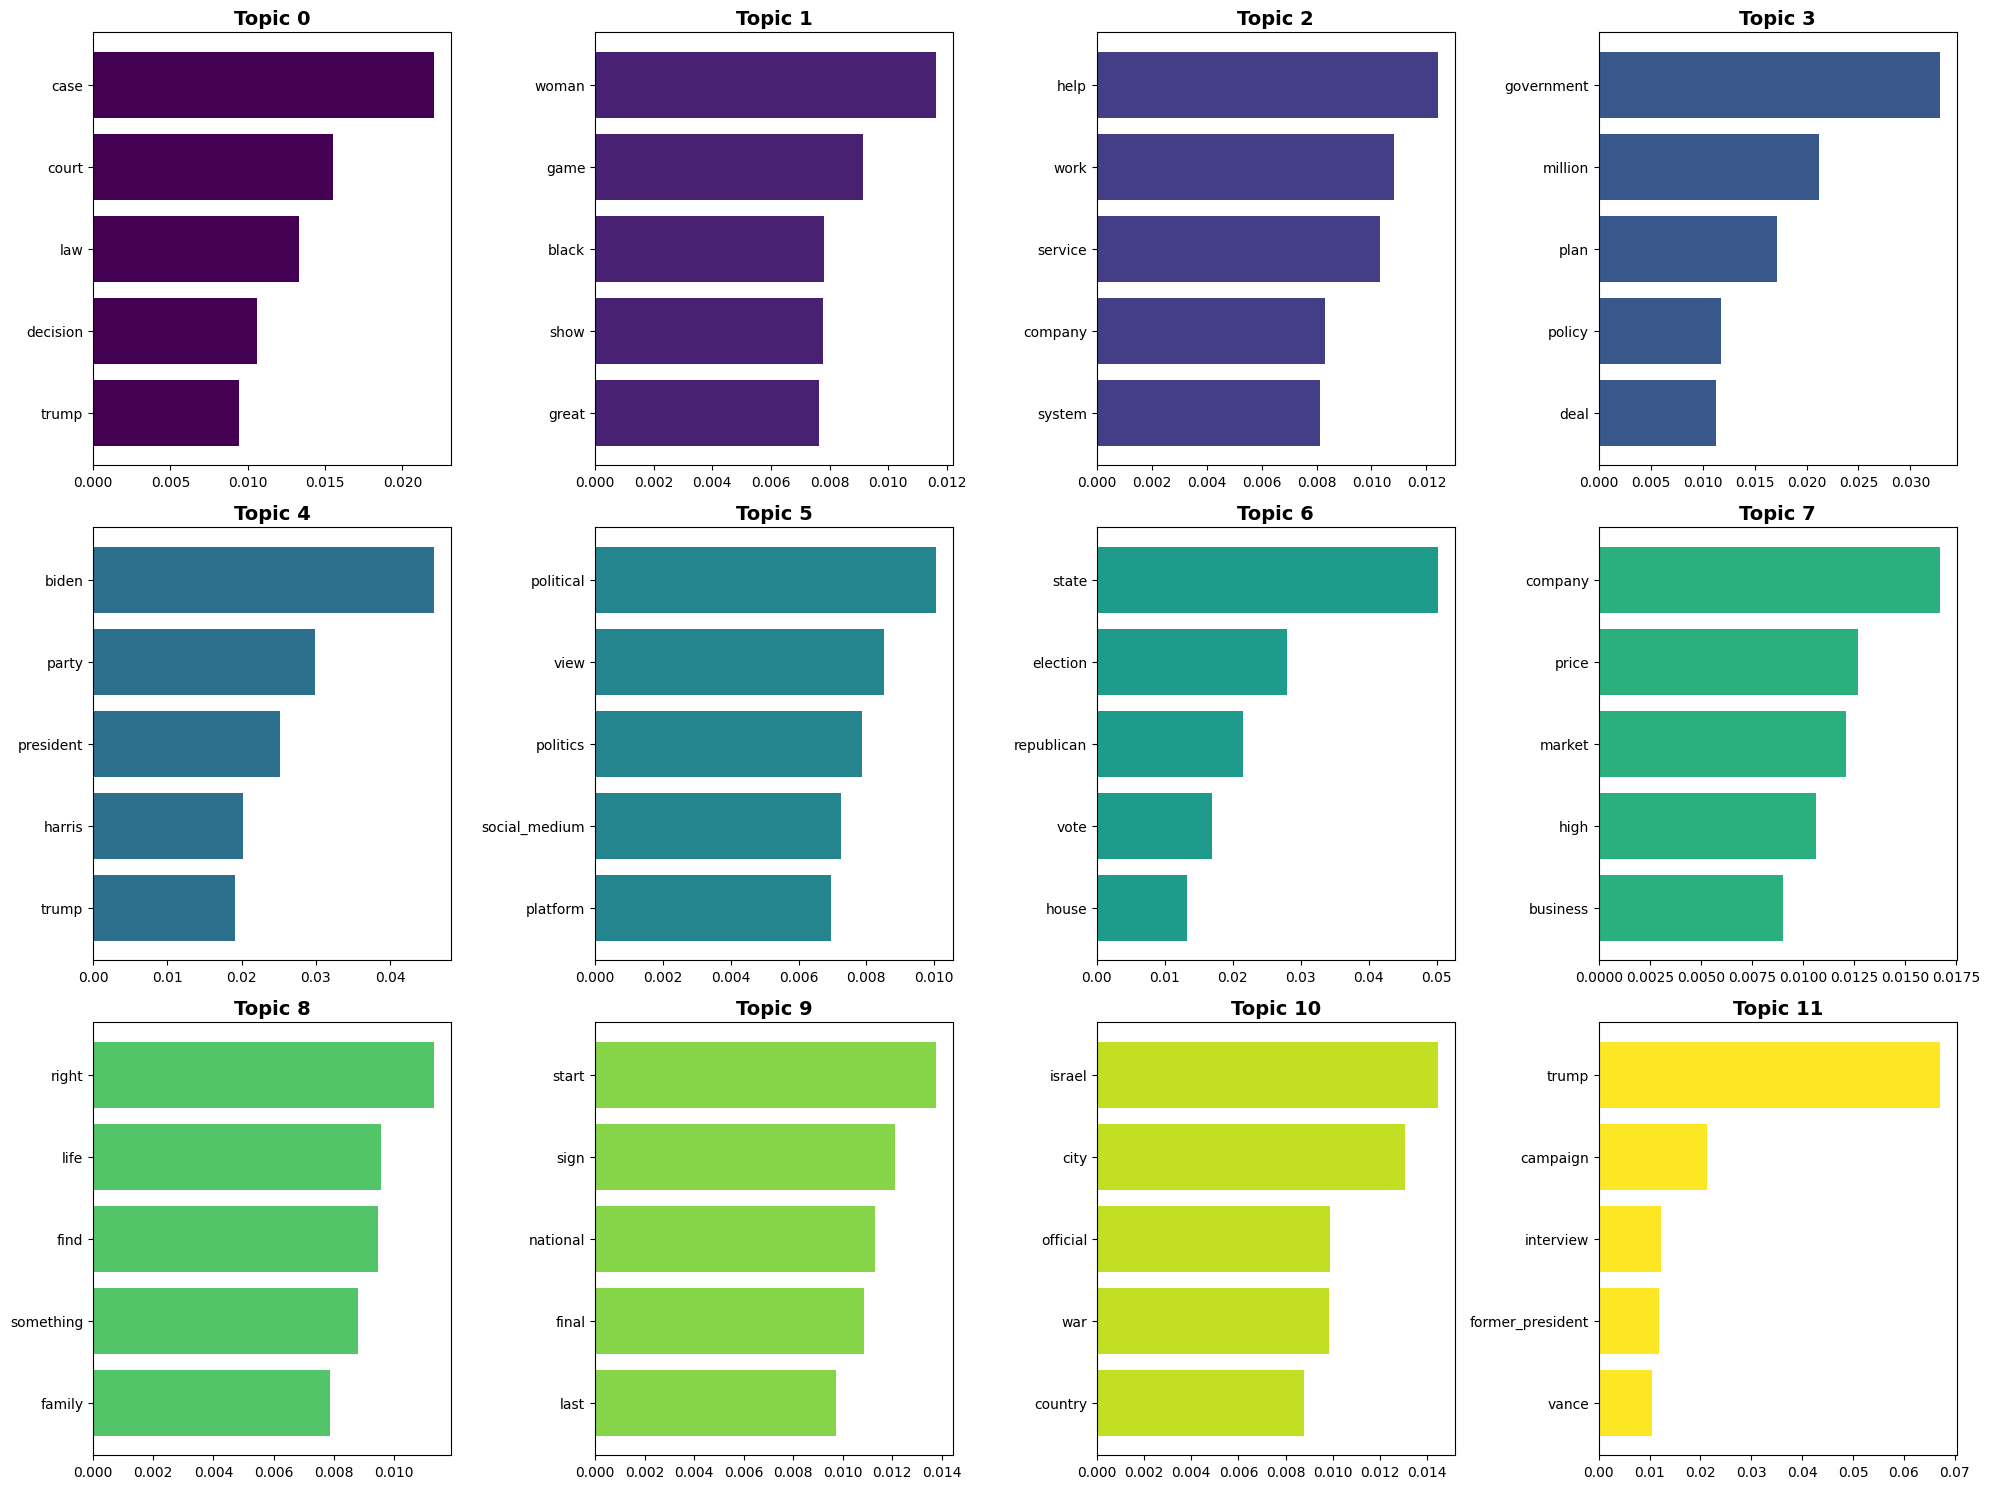

In [5]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaMulticore
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import multiprocessing
from gensim.models.phrases import Phrases, Phraser
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Load dataset (update with your actual file path)
df = pd.read_csv("../datasets/news_dataset_content_cleaned.csv")  # Replace with actual file path

# Convert content_words column (assumed to be list-like) into a list of tokenized words
df['content_words'] = df['content_words'].apply(eval)  # Ensure the column is in list format

# 1. Detect Bigrams and Trigrams with Higher Threshold
bigram = Phrases(df['content_words'], min_count=10, threshold=30)  # Increased min_count and threshold
trigram = Phrases(bigram[df['content_words']], min_count=10, threshold=30)

bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# Apply bigrams and trigrams
df['content_words'] = df['content_words'].apply(lambda x: trigram_mod[bigram_mod[x]])

# 2. Remove Low-Information Words (Expanded Stopwords List)
custom_stopwords = set([
    "said", "one", "new", "people", "like", "time", "year", "just", "know", "think", "make", "get", "also",
    "many", "day", "week", "month", "even", "still", "back", "see", "way", "want", "need", "thing", "go",
    "use", "give", "first", "two", "three", "take", "since", "well", "much", "could", "should", "would", 
    "question", "statement", "really", "going", "u", "best", "lot", "good", "far", "added", "got", "may",
    "according", "might", "whether", "say", "look", "always", "let", "yet", "asked", "across", "never",
    "di", "mean", "around"
])
df['content_words'] = df['content_words'].apply(lambda x: [word for word in x if word not in custom_stopwords])

# 3. Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['content_words'])

# 4. Filter out extreme tokens (Higher no_below to remove rare words)
dictionary.filter_extremes(no_below=20, no_above=0.3, keep_n=10000)  # Increased no_below from 10 to 20

# 5. Convert to Bag-of-Words format
corpus = [dictionary.doc2bow(text) for text in df['content_words']]

# 6. Train LDA Model Using MULTICORE Processing
num_topics = 12
lda_model = LdaMulticore(
    corpus=corpus, 
    num_topics=num_topics, 
    id2word=dictionary, 
    passes=10,  # Increased passes for better convergence
    workers=multiprocessing.cpu_count(),  # Use all available CPU cores
    random_state=42
)

# 7. Compute LDA Coherence Score
coherence_model = CoherenceModel(model=lda_model, texts=df['content_words'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"LDA Coherence Score: {coherence_score:.4f}")

# 8. Print the top words in each topic
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx}: {topic}\n")

# 9. Visualize topics using WordClouds (4 topics per row, 3 rows) with improved formatting
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(19, 14))  # Smaller figure size
axes = axes.flatten()

for i in range(num_topics):
    topic_words = dict(lda_model.show_topic(i, 20))
    wordcloud = WordCloud(width=300, height=300, background_color='white').generate_from_frequencies(topic_words)
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f"Topic {i}", fontsize=14, fontweight='bold')  # Larger title proportionate to wordcloud

plt.tight_layout()
plt.show()

# 10. Save the model and dictionary
lda_model.save("lda_model.model")
dictionary.save("lda_dictionary.dict")

# 11. Generate Bar Chart for Top 5 Words in Each Topic with Fully Differentiated Colors
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()
colors = plt.cm.viridis(np.linspace(0, 1, num_topics))  # Use a unique color for each topic

for i in range(num_topics):
    topic_words = dict(lda_model.show_topic(i, 5))  # Get top 5 words
    words = list(topic_words.keys())
    values = list(topic_words.values())
    
    axes[i].barh(words, values, color=colors[i])  # Assign different colors to each topic
    axes[i].invert_yaxis()
    axes[i].set_title(f"Topic {i}", fontsize=14, fontweight='bold')
    
plt.tight_layout()
plt.show()
